# Replication assignment

Replicate the results found in [Bryant et al  (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), [Rozenberg et al (2014)](https://link.springer.com/content/pdf/10.1007/s10584-013-0904-3.pdf), and [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004). The data files are named accordingly. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://www.sciencedirect.com/science/article/pii/S1364815215301092), which gives a succint summary of these three cases. 

An additional useful, if dated, resource for Bryant et al is https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/ 



# Bryant & Lempert

Load the data using pandas. The experiments are in colums 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the peel_alpha in PRIM. This controls the leniency of the algorithm.


In [14]:
import pandas
import matplotlib.pyplot as plt

from ema_workbench.analysis import prim
from ema_workbench.util import ema_logging

bryant_df = pandas.read_csv('data/bryant et al 2010.csv') # read data and make a dataframe
# print(bryant_df.tail()) # print tail of the data frame


C:\Users\teres\Anaconda3\lib\site-packages\ema_workbench\em_framework\evaluators.py:22: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  'ipyparallel not installed - IpyparalleEvaluator not available')
C:\Users\teres\Anaconda3\lib\site-packages\ema_workbench\em_framework\optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)
C:\Users\teres\Anaconda3\lib\site-packages\ema_workbench\analysis\prim.py:31: ImportWarning: altair based interactive inspection not available
  "inspection not available"), ImportWarning)


In [16]:
bryant_df.head(5)

,renew req %,Pricing,Cellulosic cost,Total biomass,Feedstock distribution,Cellulosic yield,Oil elasticity,Demand elasticity,Electricity coproduction,oil supply shift,Biomass backstop price,input record,Expen change,Incremental cost,Less than 10%,Greater than 90%
0,0.25,1,124.900001,612.799988,0.04,89.500000,0.206,-0.469,1.83,0.078,162.199997,1001,60.00,276.47,0,0
1,0.25,1,67.300003,837.200012,0.18,95.900002,0.277,-0.380,0.01,-0.032,150.300003,1002,19.42,85.07,0,0
2,0.25,1,71.000000,740.400024,0.80,83.500000,0.445,-0.778,0.25,-0.093,135.800003,1003,17.76,200.11,0,0
3,0.25,1,80.099998,995.599976,0.58,82.400002,0.291,-0.334,0.08,-0.086,98.800003,1004,37.88,130.86,0,0
4,0.25,1,76.400002,476.399994,0.79,97.500000,0.443,-0.205,1.59,0.073,163.500000,1006,66.13,180.11,0,0


In [17]:
x = bryant_df.iloc[:, 2:11]
y = bryant_df.iloc[:,15].values

In [18]:
prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

                          reproduce coverage  reproduce density
Total biomass                          100.0              100.0
Demand elasticity                      100.0              100.0
Biomass backstop price                 100.0              100.0
Cellulosic cost                         90.0               90.0
Cellulosic yield                        30.0               20.0
Electricity coproduction                10.0                0.0
Feedstock distribution                   0.0                0.0
Oil elasticity                           0.0                0.0
oil supply shift                         0.0                0.0
coverage     0.752809
density      0.770115
id                 21
mass        0.0986395
mean         0.770115
res_dim             4
Name: 21, dtype: object

                            box 21                                            
                               min         max                       qp values
Total biomass           450.000000  755.79998

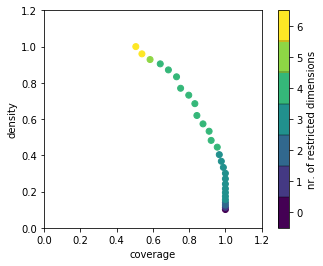

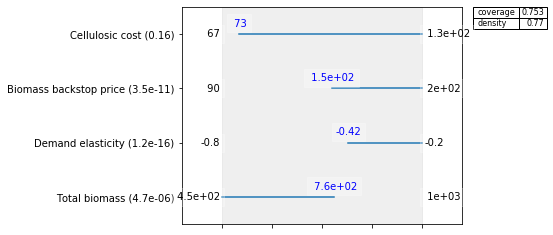

In [24]:
box1.show_tradeoff()
print(box1.resample(21))
box1.inspect(21)
box1.inspect(21, style='graph')

plt.show()

# Rozenberg et al


* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply prim separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM


In [12]:
import pandas

rozenberg_df = pandas.read_csv('data/Rozenberg et al 2014.csv') # read data and make a dataframe
# print(rozenberg_df.tail()) # print tail of the data frame

# Hamarat et al

this is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?


In [9]:
import ema_workbench

hamarat_tuple = ema_workbench.load_results('data/Hamarat et al 2013.gz')
print(hamarat_tuple) # print the tuple

(     SWITCH Market price determination SWITCH TGC obligation curve  \
0                                    1                           2   
1                                    2                           3   
2                                    1                           3   
3                                    2                           2   
4                                    1                           2   
...                                ...                         ...   
4995                                 1                           1   
4996                                 1                           2   
4997                                 1                           1   
4998                                 1                           3   
4999                                 1                           1   

     SWITCH carbon cap SWITCH carbon price determination  \
0                    3                                 2   
1                    2                